In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import matplotlib
from windrose import WindroseAxes
import seaborn as sns
from CoreBx_funcs import *
%matplotlib inline


In [2]:
r = yaml2dict('small_island_box.yml')
print(r)

dem_path ='C:/crs/proj/2019_DorianOBX/Dorian_paper_analyses/rotated_dems/'

# these offsets are the mean anomaly relative to the 10-map mean per Analyze_rotated_stable_points_refac
offset = np.array([0.00168195,  0.02229009, -0.02397204, -0.01150765, -0.07320715, -0.02726184,
 -0.03547332, -0.02953579, -0.02719979,  0.00756222])

# read in the multi-map .nc file
fn = r['name']+'_clipped.nc'
dsa = xr.open_dataset(dem_path+fn)
dsaa = np.squeeze(dsa.to_array())
nmaps,ncross,nalong=np.shape(dsaa)
print('nmaps, ncross, nalong: ',nmaps,ncross,nalong)

# Correct for uniform offsets
for i in range(0, nmaps):
    dsaa[i,:,:] = dsaa[i,:,:] - offset[i] 

{'name': 'ncorebx_small', 'e0': 383520.0, 'n0': 3860830.0, 'xlen': 25000.0, 'ylen': 1200.0, 'dxdy': 1.0, 'theta': 42.0}
nmaps, ncross, nalong:  10 1200 25000


In [3]:
before = np.ravel(dsaa[0,:,:])
after  = np.ravel(dsaa[1,:,:])
before[np.where(before>6.)]=np.nan
before[np.where(before<-1.)]=np.nan
after[np.where(after>6.)]=np.nan
after[np.where(after<-1.)]=np.nan
good = np.where(np.isfinite(before+after))
before = before[good]
after = after[good]

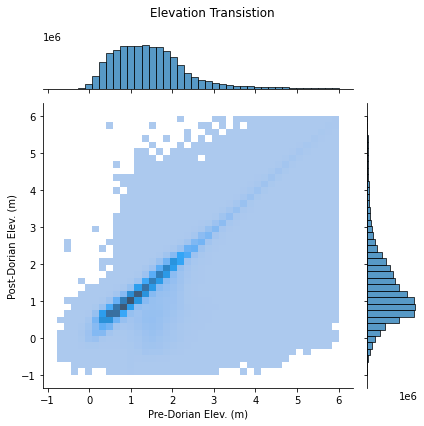

In [4]:
df_transition=pd.DataFrame({'Pre-Dorian Elev. (m)': before, 'Post-Dorian Elev. (m)': after})
p1=sns.jointplot(data=df_transition, x="Pre-Dorian Elev. (m)", y="Post-Dorian Elev. (m)", bins=40, kind="hist", marginal_kws=dict(bins=40))
p1.fig.suptitle("Elevation Transistion")
p1.fig.tight_layout()
plt.savefig('elev_histogram_transition.png')

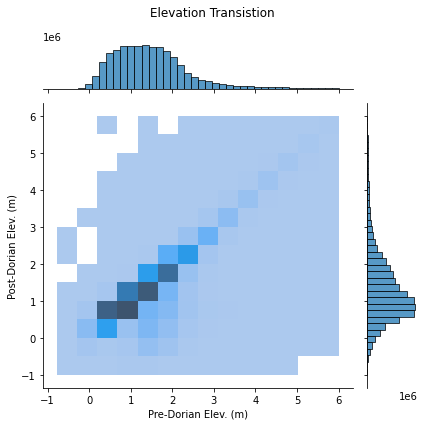

In [7]:
df_transition=pd.DataFrame({'Pre-Dorian Elev. (m)': before, 'Post-Dorian Elev. (m)': after})
p1=sns.jointplot(data=df_transition, x="Pre-Dorian Elev. (m)", y="Post-Dorian Elev. (m)", bins=14, kind="hist", marginal_kws=dict(bins=40))
p1.fig.suptitle("Elevation Transistion")
p1.fig.tight_layout()
plt.savefig('elev_histogram_transition.png')

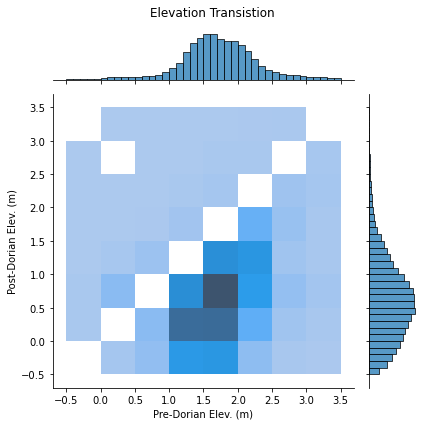

In [11]:
# Limit to -.5 to 3.5
before = np.ravel(dsaa[0,:,:])
after  = np.ravel(dsaa[1,:,:])
diff = after-before
before[np.where(np.abs(diff)<0.5)]=np.nan
after[np.where(np.abs(diff)<0.5)]=np.nan

before[np.where(before>3.5)]=np.nan
before[np.where(before<-.5)]=np.nan
after[np.where(after>3.5)]=np.nan
after[np.where(after<-.5)]=np.nan
good = np.where(np.isfinite(before+after))
before = before[good]
after = after[good]

df_transition=pd.DataFrame({'Pre-Dorian Elev. (m)': before, 'Post-Dorian Elev. (m)': after})
p1=sns.jointplot(data=df_transition, x="Pre-Dorian Elev. (m)", y="Post-Dorian Elev. (m)", bins=8, kind="hist", marginal_kws=dict(bins=40))
p1.fig.suptitle("Elevation Transistion")
p1.fig.tight_layout()
plt.savefig('elev_histogram_transition.png')

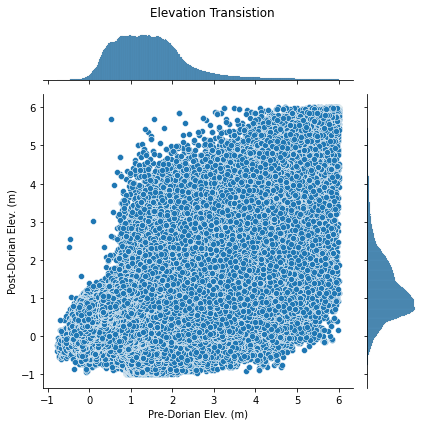

In [6]:
p1=sns.jointplot(data=df_transition, x="Pre-Dorian Elev. (m)", y="Post-Dorian Elev. (m)", kind="scatter")
p1.fig.suptitle("Elevation Transistion")
p1.fig.tight_layout()
plt.savefig('elev_scatter_transition.png')